In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Advertising Data

In [12]:
data = np.genfromtxt('data/advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [23]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    np.random.seed(42)  # Set a random seed for reproducibility
    thetas = np.random.randn(4, 1)  # Uncomment this line for real application
    # thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i  # This code is used for this assignment only
            # random_index = np.random.randint(N)  # In real application, you should use this code

            xi = X_b[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]

            # Compute output
            yi_hat = xi.dot(thetas)

            # Compute loss li
            li = yi_hat - yi

            # Compute gradient for loss
            gi = xi.T.dot(li)

            # Update theta
            thetas = thetas - learning_rate * gi

            # Logging
            thetas_path.append(thetas)
            losses.append(np.sum(li**2))

    return thetas_path, losses

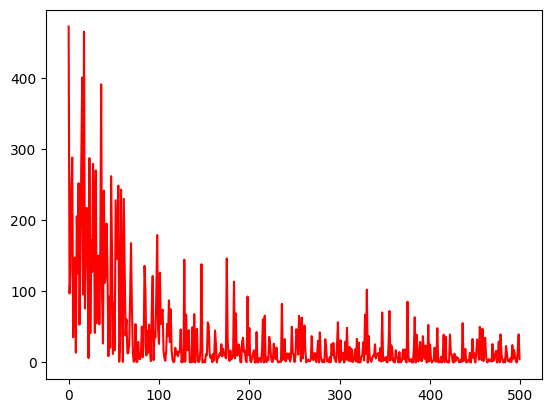

In [24]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [27]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

13879.447345780423


In [46]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    #thetas = np.random.randn(4, 1)  # Uncomment this line for a real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        #shuffled_indices = np.random.permutation(N)  # Shuffle indices for mini-batch
        shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
        132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
        185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
        165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
        169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
        77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
        195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
        92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
        174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
        129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
        168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
        133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
        154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            # Compute output
            yi_hat = xi.dot(thetas)

            # Compute loss
            loss = yi_hat - yi

            # Compute derivative of loss
            gradient_loss = loss

            # Compute derivative of parameters
            gradients = xi.T.dot(gradient_loss) / minibatch_size

            # Update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss ** 2) / (2 * minibatch_size)  # Mean Squared Error
            losses.append(loss_mean)

    return thetas_path, losses

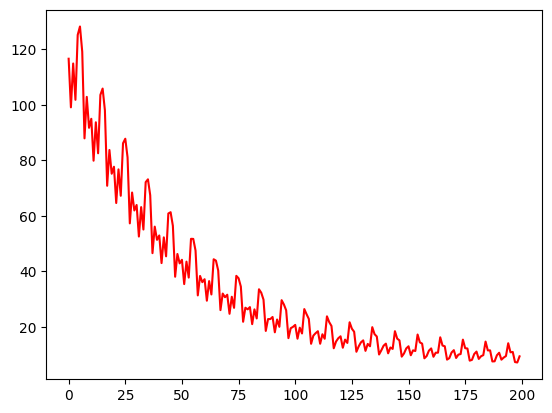

In [47]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

In [48]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)
print ( round ( sum( losses ) ,2) )

8865.65


In [53]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    #thetas = np.random.randn(4, 1)  # Uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # Compute output
        y_hat = X_b.dot(thetas)

        # Compute loss
        loss = y_hat - y

        # Compute loss's derivative
        loss_derivative = loss / len(y)  # Mean loss for normalization

        # Compute parameters' derivative
        gradients = X_b.T.dot(loss_derivative)

        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)
        
        # Compute mean loss and append to losses
        mean_loss = np.sum(loss**2) / len(y)  # Mean squared error
        losses.append(mean_loss)

    return thetas_path, losses

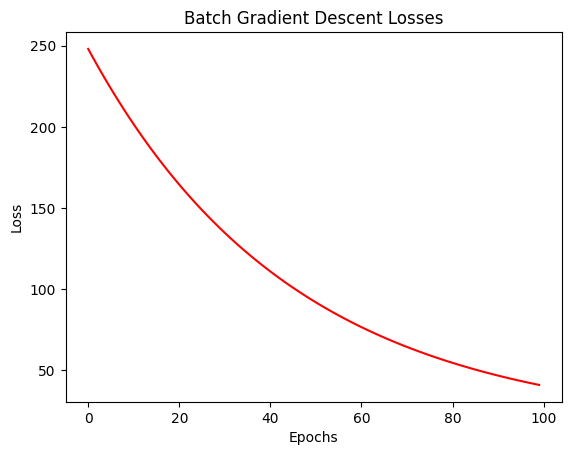

In [34]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))

plt.plot(x_axis, losses[:100], color="r")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent Losses')
plt.show()

In [54]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate
=0.01)
print ( round ( sum( losses ) ,2) )

10706.3


# Bitcoin Forecasting

In [37]:
# Load dataset
import pandas as pd

df = pd.read_csv ('data/BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()

In [38]:
# Range of dates covered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

# ####### Your code here ########

for year in unique_years:
    # ####### Your code here ########

    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

2014-11-28 to 2022-03-01


NameError: name 'unique_years' is not defined